# **TESTS: Converter_Tracker_Resize**

## **Libraries**

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import random
from core.config import LayoutConfig, GlobalConfig
from operators.image_io import ImageIO
from utils.axis_tracker import AxisTracker

## **Image Directory**

In [2]:
root = Path.cwd().parent.parent.parent / "03_EXAMPLES_DATA" / "Images"
images_path = sorted([str(p) for p in root.rglob("*.png")])
rand = random.randint(0, len(images_path) - 2)

## **Configurations**

In [4]:
layout_cfg = LayoutConfig(
    layout_name="HWC",
    layout_framework="numpy",
    layout_ensured_name="NCHW",   
)

global_cfg = GlobalConfig( 
    framework="torch",
    output_format="numpy",
    add_batch_dim=True, 
)

# ====[ Init ImageIO ]====
io = ImageIO(
    layout_cfg=layout_cfg,
    global_cfg=global_cfg,
)

## **Load images and tag**

In [5]:
img1 = io.read_image(images_path[rand], framework="torch", enable_uid=True)
img2 = io.read_image(images_path[rand + 1], framework="torch", enable_uid=True)

print("Tag 1:", io.has_tag(img1, "torch"))
print("Tag 2:", io.has_tag(img2, "torch"))
print("Résumé tag 1:", io.get_tag_summary(img1,"torch"))
print("Résumé tag 2:", io.get_tag_summary(img2,"torch"))

Tag 1: True
Tag 2: True
Résumé tag 1: {'shape': torch.Size([1, 3, 1356, 2040]), 'framework': 'torch', 'status': 'original', 'uid': '38fdff3e', 'axes': {'channel': 1, 'batch': 0, 'direction': None, 'height': 2, 'width': 3, 'depth': None}, 'trace': ['original']}
Résumé tag 2: {'shape': torch.Size([1, 3, 1536, 2040]), 'framework': 'torch', 'status': 'original', 'uid': '01565b0c', 'axes': {'channel': 1, 'batch': 0, 'direction': None, 'height': 2, 'width': 3, 'depth': None}, 'trace': ['original']}


## **Convert and display img1**

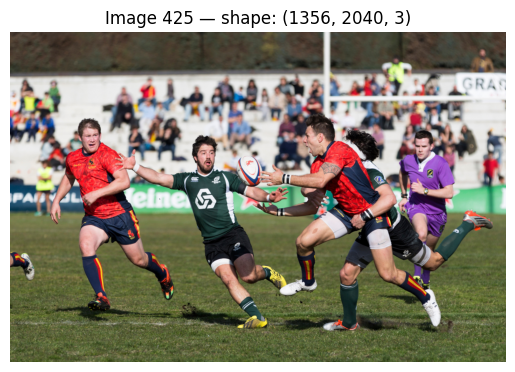

In [6]:
img1_np = io.to_output(img1, framework="numpy", tag_as="output")
plt.imshow(img1_np.squeeze(), cmap="gray")
plt.title(f"Image {rand} — shape: {img1_np.shape}")
plt.axis("off")
plt.show()

## **Summary & Axis Tracking**

In [7]:
io.summary(img1_np, framework="numpy")

tracker = AxisTracker(img1, operator=io, framework="torch")
tracker.tag_summary()

tracker_moved = tracker.moveaxis(src=1, dst=2)
tracker_moved.tag_summary()
print("Shape après déplacement:", tracker_moved.image.shape)

Shape     : (1356, 2040, 3)
Dtype     : float32
Device    : cpu
Framework : numpy
Output    : numpy
Tag Info  :
  - status: output
  - converted: True
  - framework: numpy
  - device: cuda
  - original_shape: (1, 3, 1356, 2040)
  - shape_after: (1356, 2040, 3)
  - channel_axis_original: 2
  - layout: {'name': 'HWC', 'ndim': 3, 'direction_axis': None, 'batch_axis': None, 'channel_axis': 2, 'depth_axis': None, 'height_axis': 0, 'width_axis': 1, 'description': 'Height, Width, Channel (common numpy format)'}
  - layout_name: HWC
  - axis_map: {'batch': None, 'channel': 2}
  - trace: ['output']
  - op_params: {}
  - batch_axis: None
  - channel_axis: 2
  - direction_axis: None
  - height_axis: 0
  - width_axis: 1
  - depth_axis: None
  - ndim: 3
====[ AxisTracker Summary ]====
         status : original
      framework : torch
   channel_axis : 1
     batch_axis : 0
 direction_axis : None
     depth_axis : None
    height_axis : 2
     width_axis : 3
    layout_name : NCHW
    shape_after :

## **Resize Test: match_to first**

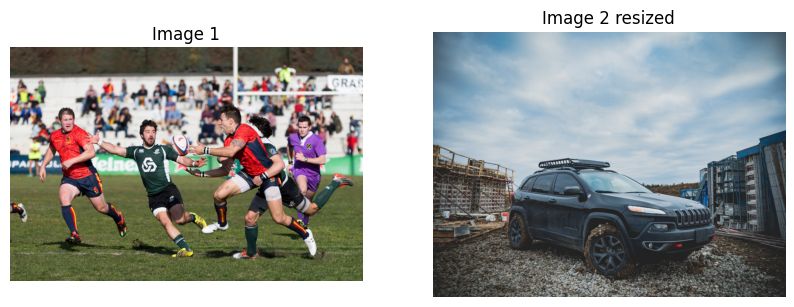

In [8]:
img2_resized = io.load_batch([images_path[rand + 1]], to="torch", match_to="first", stack=False)[0]

tracker1 = AxisTracker(img1, io, framework="torch")
tracker2 = AxisTracker(img2_resized, io, framework="torch")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(tracker1.image.detach().squeeze().permute(1, 2, 0).cpu().numpy())
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tracker2.image.detach().squeeze().permute(1, 2, 0).cpu().numpy())
plt.title("Image 2 resized")
plt.axis("off")
plt.show()

## **Test batch resized with stack**

In [9]:
batch_paths = images_path[:4]
batch = io.load_batch(batch_paths, to="torch", stack=True, match_to="first")

print(f"\n Batch loaded, shape: {batch.shape}")
for i, img in enumerate(batch):
    print(f"Image {i} shape: {img.shape}")


 Batch loaded, shape: torch.Size([4, 1, 3, 1356, 2040])
Image 0 shape: torch.Size([1, 3, 1356, 2040])
Image 1 shape: torch.Size([1, 3, 1356, 2040])
Image 2 shape: torch.Size([1, 3, 1356, 2040])
Image 3 shape: torch.Size([1, 3, 1356, 2040])


## **Tracker tag summary**

In [10]:
tracker_batch = AxisTracker(batch[0], io, framework="torch")
tracker_batch.tag_summary()

====[ AxisTracker Summary ]====
            uid : 5fb4063f-97e4-4ac2-b97e-1c0b27bd1768
